In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '../data/processed/Fraudulent2_processed.csv'
df = pd.read_csv(file_path)
df.head()

,transaction_id,customer_id,kyc_verified,account_age_days,transaction_amount,channel,timestamp,is_fraud,hour,day_of_week,is_high_value
0,TXN_200000,CUST_799,Yes,1050,256369.0,Mobile,2025-08-12 02:10:24,0,2,Tuesday,1
1,TXN_200001,CUST_484,Yes,295,6581.0,Mobile,2025-08-25 01:14:31,0,1,Monday,0
2,TXN_200002,CUST_791,Yes,2083,4492.0,Mobile,2025-08-17 12:12:40,0,12,Sunday,0
3,TXN_200003,CUST_664,Yes,2789,275413.0,Pos,2025-08-07 06:23:54,0,6,Thursday,1
4,TXN_200004,CUST_157,Yes,694,98098.0,Pos,2025-08-20 21:55:54,0,21,Wednesday,1


In [3]:
fraud_counts = df['is_fraud'].value_counts()
print(fraud_counts)

is_fraud
0    4568
1     432
Name: count, dtype: int64


In [4]:
fraud_percentage = fraud_counts[1] / fraud_counts.sum() * 100
non_fraud_percentage = fraud_counts[0] / fraud_counts.sum() * 100

print(f"\nFraudulent Transactions: {fraud_percentage:.2f}%")
print(f"Non-Fraudulent Transactions: {non_fraud_percentage:.2f}%")


Fraudulent Transactions: 8.64%
Non-Fraudulent Transactions: 91.36%


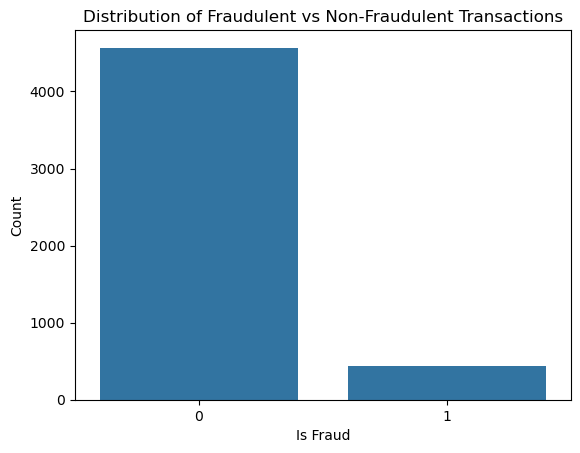

In [5]:
import seaborn as sns

sns.countplot(x='is_fraud', data=df)
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Is Fraud')
plt.ylabel('Count')


plt.savefig("../docs/fraud_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

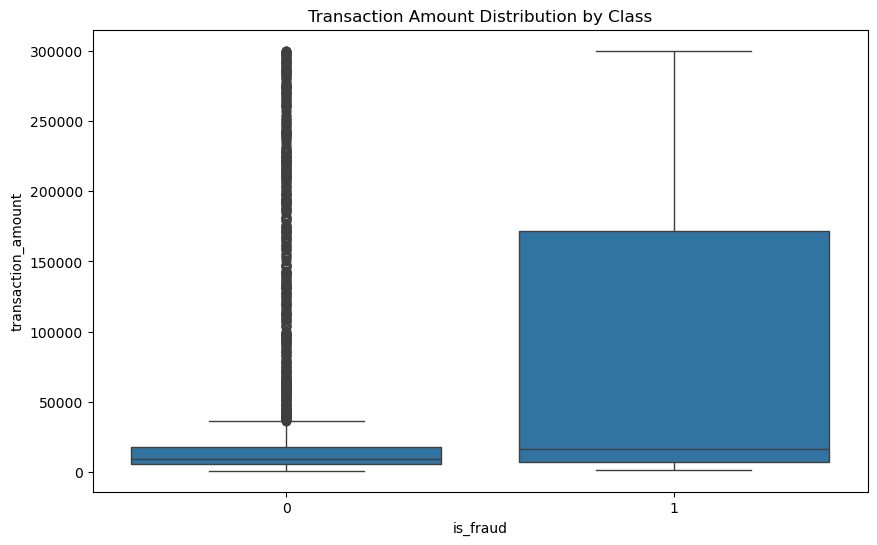

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='transaction_amount', data=df)
plt.title('Transaction Amount Distribution by Class')
# plt.ylim(0, 5000)


plt.savefig("../docs/Transaction_amount_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

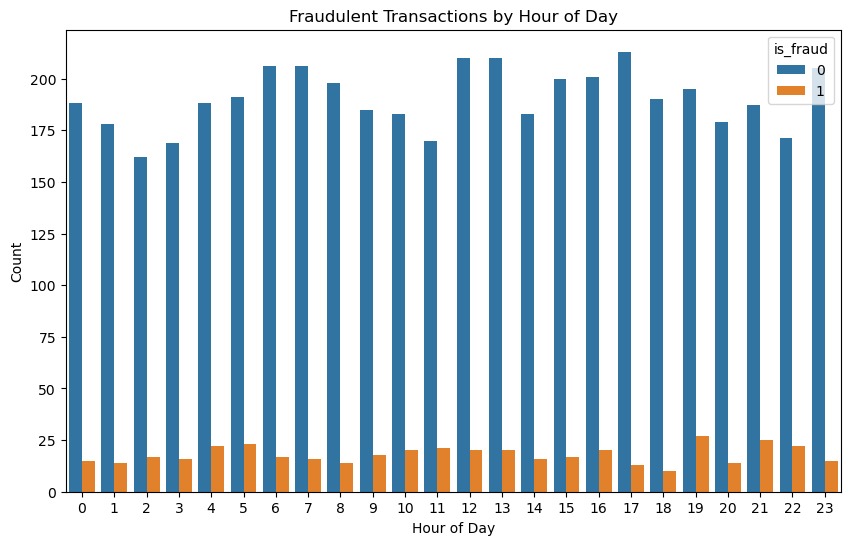

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='is_fraud', data=df)
plt.title('Fraudulent Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')

plt.savefig("../docs/Transactions_by_hour.png", dpi=300, bbox_inches='tight')
plt.show()

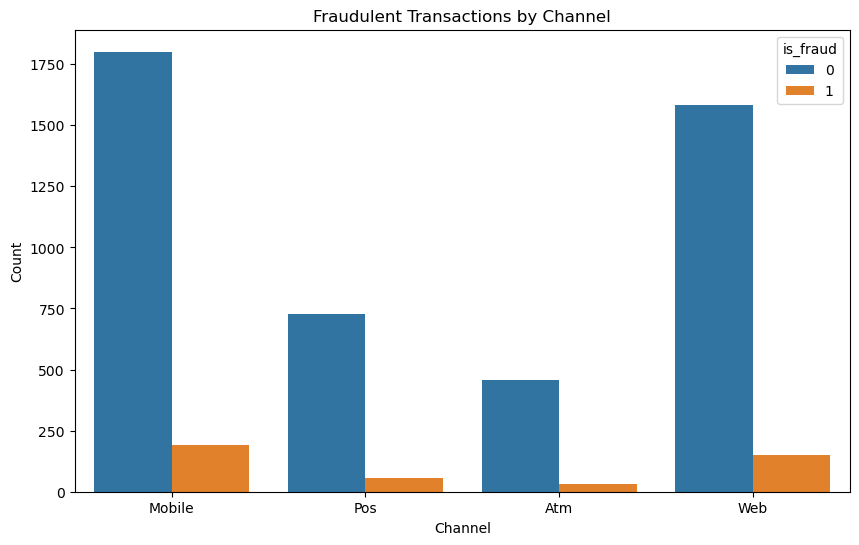

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='channel', hue='is_fraud', data=df)
plt.title('Fraudulent Transactions by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')

plt.savefig("../docs/Transactions_bychannels.png", dpi=300, bbox_inches='tight')
plt.show()

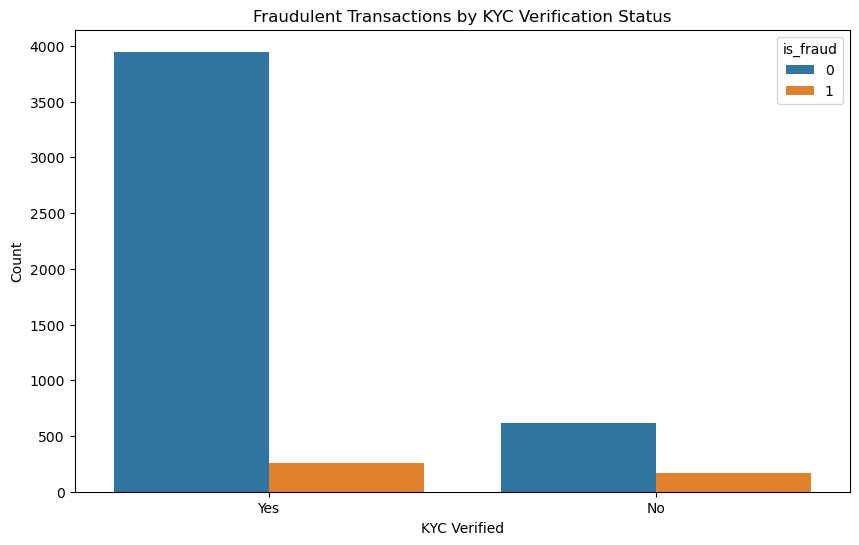

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='kyc_verified', hue='is_fraud', data=df)
plt.title('Fraudulent Transactions by KYC Verification Status')
plt.xlabel('KYC Verified')
plt.ylabel('Count')

plt.savefig("../docs/Transaction_by_kyc.png", dpi=300, bbox_inches='tight')
plt.show()

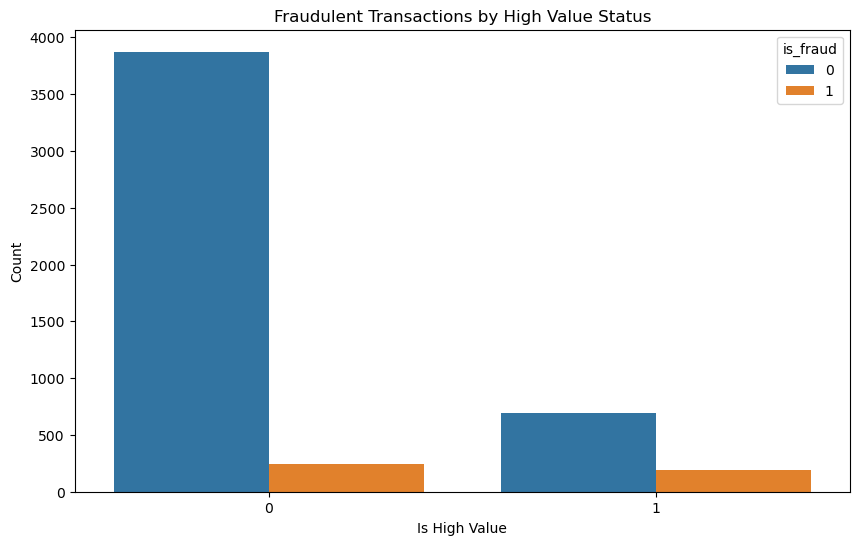

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_high_value', hue='is_fraud', data=df)
plt.title('Fraudulent Transactions by High Value Status')
plt.xlabel('Is High Value')
plt.ylabel('Count')

plt.savefig("../docs/Transactions_by_high_value_status.png", dpi=300, bbox_inches='tight')
plt.show()

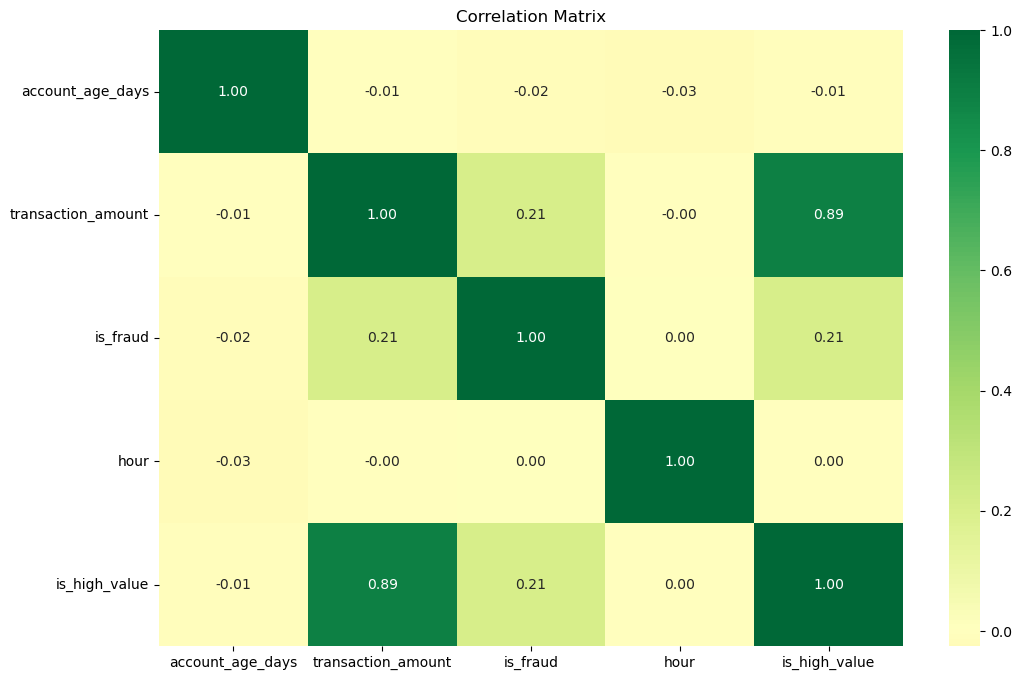

In [17]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='RdYlGn', center=0)
plt.title('Correlation Matrix')

plt.savefig("../docs/correlation matrix", dpi=300, bbox_inches='tight')
plt.show()